In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/moc0/miniconda3/envs/ml-fuel/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Define plot size
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
# Define working directory
os.chdir('/home/moc0/ai-vegetation-fuel')

In [4]:
# Load raw train data
train = pd.read_csv(os.getcwd() + "/data/inputs/train_interpTrue_raw.csv",
                    dtype={'climatic_region':'category',
                           'biome':'category',
                           'GFEDregions':'category'})
train = train.drop('Unnamed: 0', axis = 1)

# Exploratory Data Analysis

In [5]:
train.head()

,latitude,longitude,dry_matter,climatic_region,biome,GFEDregions,slope,vod,lai,spi03,...,ffmcode,dufmcode,drtcode,infsinx,fbupinx,fdsrte,frp,daysElapsed,timeYear,timeMonth
0,-32.375,28.125,1.001038,3.0,1.0,9.0,0.014507,0.228241,0.222220,-0.398828,...,3.302874,13.643188,109.829220,1.191657,22.684143,2.530905,0.000000,212,2010,8
1,17.875,82.375,27.360060,4.0,5.0,12.0,0.024084,0.385490,0.555550,-0.349998,...,-3.897657,-43.599540,-57.730576,-3.418025,-41.623190,-7.454767,0.000000,1520,2014,3
2,-31.625,28.375,3.641749,3.0,1.0,9.0,0.020789,0.275492,0.288886,-0.404686,...,-5.759307,-13.695341,-106.551190,-0.762760,-19.835646,-1.497616,0.000000,1277,2013,7
3,13.375,37.125,17.883150,4.0,1.0,8.0,0.042149,0.256732,0.433329,-0.295313,...,1.007990,-88.729330,26.709599,1.302401,-74.875960,3.221945,0.000000,455,2011,4
4,8.125,-1.625,1.747495,4.0,1.0,8.0,0.006682,0.199548,0.722215,1.403907,...,-1.280416,-128.986300,-210.755860,-1.751252,-125.311600,-7.706358,0.007889,1492,2014,2


In [6]:
train.describe()

,latitude,longitude,dry_matter,slope,vod,lai,spi03,spi06,spi12,d2m,...,ffmcode,dufmcode,drtcode,infsinx,fbupinx,fdsrte,frp,daysElapsed,timeYear,timeMonth
count,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,...,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000,530032.000000
mean,3.655381,18.944044,81.688910,0.008974,0.372455,1.198224,-0.150948,-0.150079,-0.104575,0.207567,...,0.992243,9.640836,24.398638,0.486638,10.198012,1.021441,0.016800,1299.705472,2013.057719,7.037356
std,25.075860,62.861161,231.033890,0.010678,0.174444,1.240191,0.966769,0.990232,1.020436,1.449496,...,3.104970,50.228942,112.639016,1.591400,48.270810,3.765627,0.065342,720.506871,1.975931,3.128706
min,-53.375000,-178.375000,0.000003,0.000100,0.013333,0.000000,-3.090235,-3.090235,-3.090235,-10.326317,...,-29.217953,-487.233900,-995.420800,-14.604648,-434.393680,-42.597305,0.000000,90.000000,2010.000000,1.000000
25%,-14.375000,-13.875000,2.865247,0.002679,0.238871,0.444440,-0.787499,-0.814844,-0.787499,-0.582896,...,-0.309050,-9.317945,-33.849669,-0.313922,-10.052906,-0.584911,0.000000,638.000000,2011.000000,5.000000
50%,-4.875000,24.875000,12.255775,0.005189,0.339245,0.811103,-0.156640,-0.141014,-0.076073,0.090870,...,0.649816,2.638136,14.453959,0.306134,3.965799,0.381645,0.000000,1308.000000,2013.000000,7.000000
75%,11.875000,39.125000,56.225450,0.010857,0.477850,1.399986,0.472265,0.513283,0.591407,0.900308,...,2.224207,25.823007,78.100291,1.179688,28.332432,2.539695,0.011826,1946.000000,2015.000000,10.000000
max,72.125000,178.125000,12042.022608,0.148362,1.246869,6.933264,3.089850,3.089455,3.089487,9.319929,...,34.290535,859.559200,1768.237300,17.965261,808.088000,45.783276,6.347862,2526.000000,2016.000000,12.000000


In [12]:
# Define target variable (y) as well as categorical and numerical features
y = 'dry_matter'
cat = ['climatic_region', 'biome', 'GFEDregions']
cont = train.columns.to_list()
for i in cat + [y]:
    cont.remove(i)
print(cont)

['latitude', 'longitude', 'slope', 'vod', 'lai', 'spi03', 'spi06', 'spi12', 'd2m', 'erate', 'fg10', 'si10', 'swvl1', 't2m', 'tprate', 'danger_risk', 'fwinx', 'ffmcode', 'dufmcode', 'drtcode', 'infsinx', 'fbupinx', 'fdsrte', 'frp', 'daysElapsed', 'timeYear', 'timeMonth']


## Check distributions of outcome variable and features

Are the target and all the continuous features normally distributed?

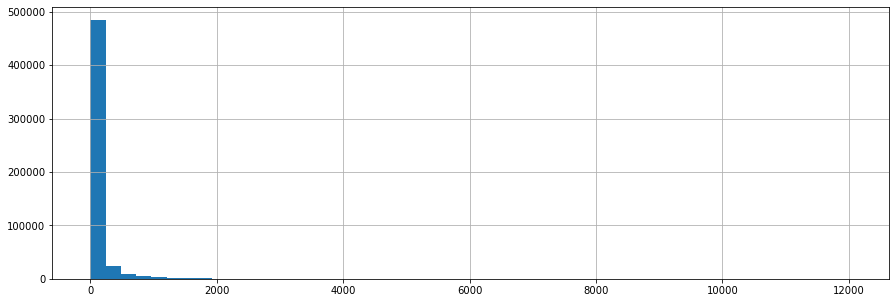

In [13]:
train[y].hist(bins = 50)

It looks like the target is highly right skewed. This could be corrected by log-transforming the target variable.

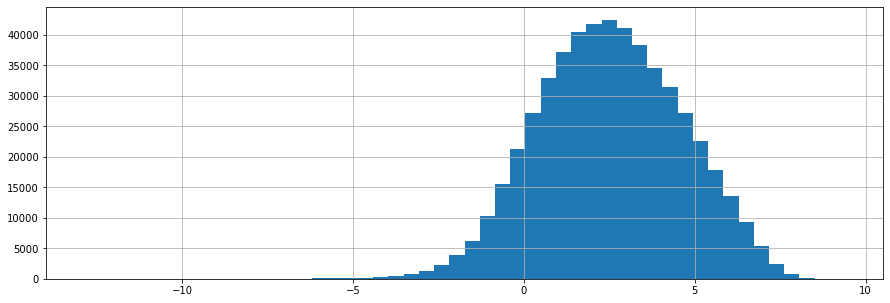

In [17]:
np.log(train[y]).hist(bins = 50)

Let's now look at the features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f247cbabc10>,
      dtype=object)

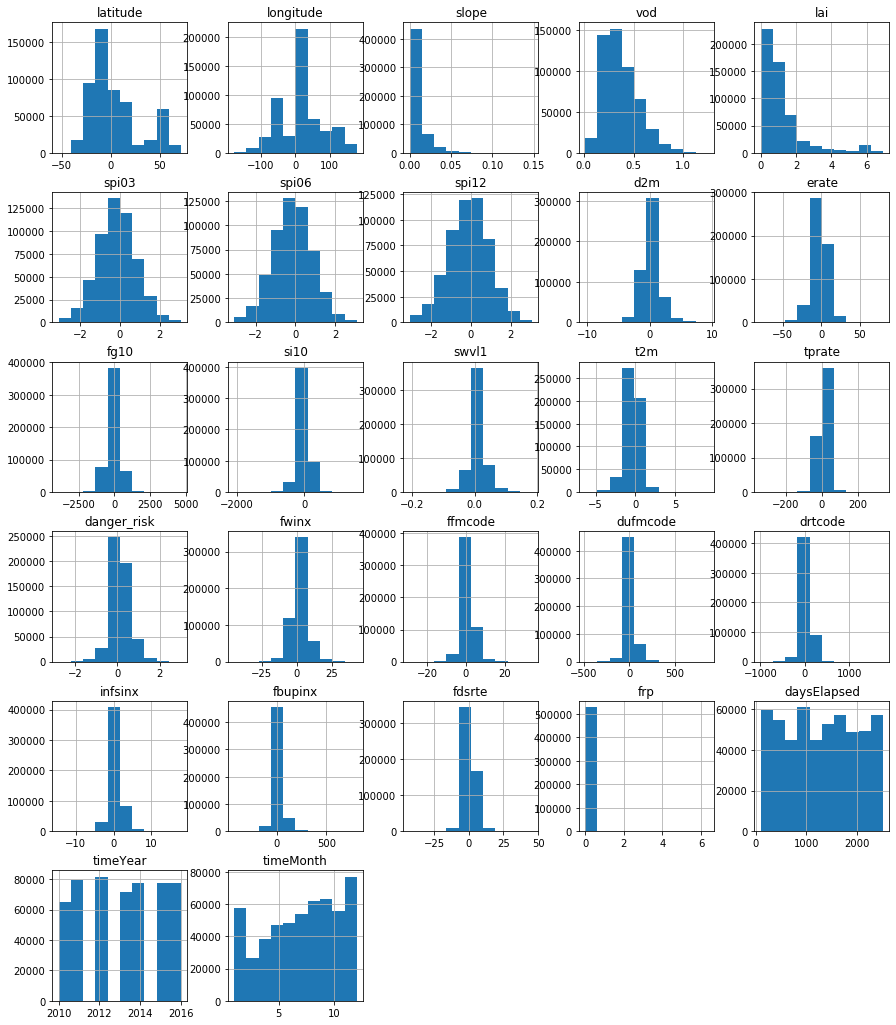

In [15]:
train[cont].hist(figsize = (15,18))

The following variables are also right skewed: slope, vod, lai, frp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2483c7fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2483c0d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2483c7fb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2483c0dbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2483c7fac0>],
 'means': []}

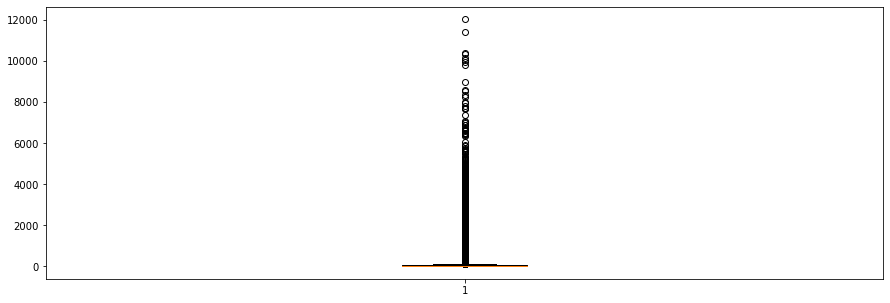

In [18]:
# Are there outliers in the dry matter?
plt.boxplot(train.dry_matter)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2483be8100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2483be8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2483bdcd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2483be8dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2483bdccd0>],
 'means': []}

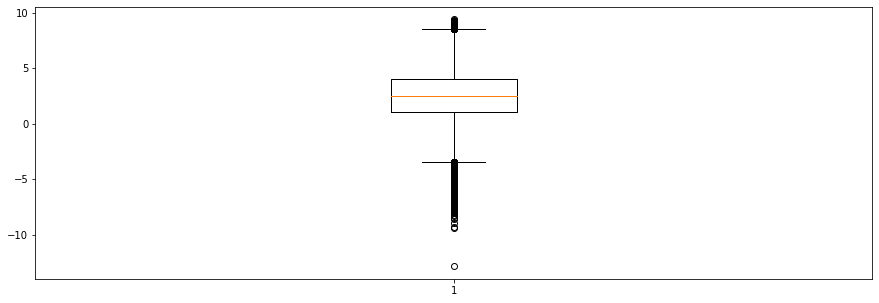

In [19]:
plt.boxplot(np.log(train.dry_matter))

It is convenient to transform variables that show pronounced skeweness. A comparison of various approaches is presented in model_definition_benchmark.ipynb

The variables in the above dataset vary in different ranges. On the one hand, this is not a problem for Decision Trees, Random Forest because these algorithm care about the order of the data, not the scale. AutoML with H2O, implements automatic normalisation for some of the algorithms.
For Deep Learning models this is a problem and in the next section I show how to remove skeweness (e.g. using transformations) and normalise the data.

At least 4 variables look left skewed: dry_matter, slope, vod and lai. Let's apply a log-transformation.
Note that the log-transformation can be applied only to values that are > 0 (log of 0 and negative number is undefined). The minimum of 2 variables (lai and frp) is zero, therefore we will have to filter out these zeros before transforming the data.

## Identify correlations amongst variables

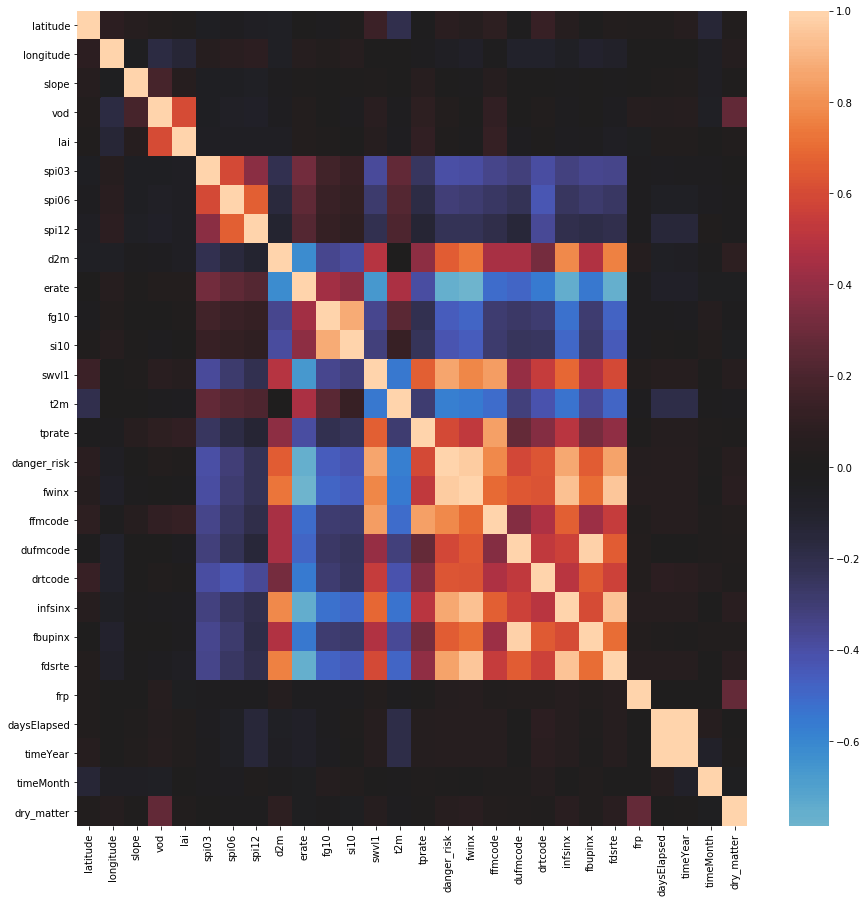

In [20]:
# Correlation matrix
C_mat = train[cont + [y]].corr()
fig = plt.figure(figsize = (15, 15))

sb.heatmap(C_mat, center=0)
plt.show()

From the plot above, the vod and frp seem to be the most correlated features to the dry matter.

# Identify possible redundant features

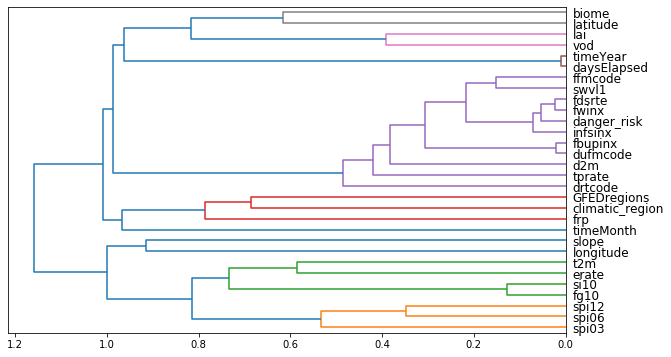

In [21]:
# Source: https://github.com/fastai/book_nbs/blob/master/utils.py
# from fastbook import *
# from fastai.tabular.all import *
# or load the following function
import scipy
from scipy.cluster import hierarchy as hc
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4) # 30x30 matrix
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()
    
# Identify important vs redundand features
cluster_columns(train.drop(y, axis = 1))

From the plot above, it seems the following features could be redundant:
- timeYear -> daysElapsed
- fbupinx -> dufmcode
- fdsrte -> fwinx

The effect of removing potential redundant information is explored in model_definition_benchmark.ipynb